主成分の分散説明率
[0.39542486 0.17836259]
固有ベクトル
[[ 0.39366953 -0.13632501  0.22267638 -0.00225793  0.22429849 -0.12463016
  -0.35926404 -0.39071171  0.2670012  -0.2790625   0.08931829 -0.27682265
  -0.35052618 -0.26951525]
 [-0.00569041 -0.48416087 -0.22359095 -0.31585588  0.01161574 -0.30055143
  -0.06711983  0.00131345 -0.0269887  -0.04122256 -0.52978274  0.27790735
   0.16277625 -0.36605886]]


C:\tools\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


<function matplotlib.pyplot.show(*args, **kw)>

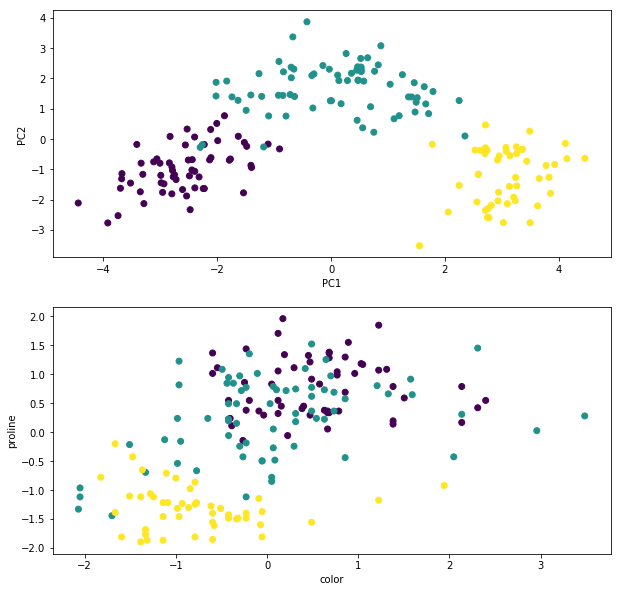

In [3]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import preprocessing, decomposition #機械学習用のライブラリを利用
 
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
#X=df_wine_all.iloc[:,1:].values
#Y=df_wine_all.iloc[:,0].values
X=df_wine_all

# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)
 
# 解説4：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2)
X_transformed = pca.fit_transform(X)
 
# 解説5: 主成分分析の結果-----------------------------
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)
print("固有ベクトル")
print(pca.components_)
 
# 6: 結果をプロットする-----------------------------
%matplotlib inline
 
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.subplot(2, 1, 2)
plt.scatter(X[:,9],X[:,12], c=Y)
plt.xlabel('color')
plt.ylabel('proline')
plt.show

各次元の寄与率: [0.92461872 0.05306648]
累積寄与率: 0.977685206318795


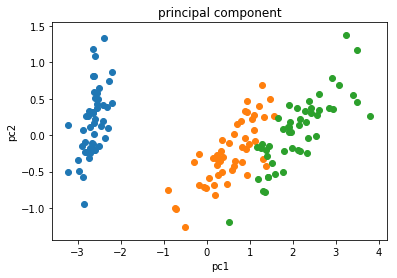

[1.00000000e+00 1.80064671e-34]


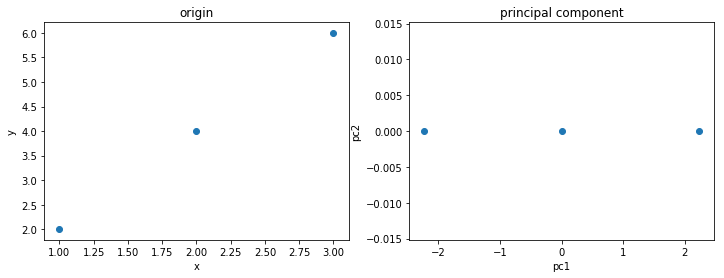

In [4]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets


def main():
    dataset = datasets.load_iris()

    features = dataset.data
    targets = dataset.target

    # 主成分分析する
    pca = PCA(n_components=2)
    pca.fit(features)

    # 分析結果を元にデータセットを主成分に変換する
    transformed = pca.fit_transform(features)

    # 主成分をプロットする
    for label in np.unique(targets):
        plt.scatter(transformed[targets == label, 0],
                    transformed[targets == label, 1])
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

    # 主成分の寄与率を出力する
    print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
    print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

    # グラフを表示する
    plt.show()


if __name__ == '__main__':
    main()
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


def main():
    # y = 2x
    features = np.array([[1, 2], [2, 4], [3, 6]])

    # グラフ描画サイズを設定する
    plt.figure(figsize=(12, 4))

    # 元データをプロットする
    plt.subplot(1, 2, 1)
    plt.scatter(features[:, 0], features[:, 1])
    plt.title('origin')
    plt.xlabel('x')
    plt.ylabel('y')

    # 主成分分析する
    pca = PCA()
    pca.fit(features)

    # 分析結果を元にデータセットを主成分に変換する
    transformed = pca.fit_transform(features)

    # 主成分をプロットする
    plt.subplot(1, 2, 2)
    plt.scatter(transformed[:, 0], transformed[:, 1])
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

    # 主成分の次元ごとの寄与率を出力する
    print(pca.explained_variance_ratio_)

    # グラフを表示する
    plt.show()


if __name__ == '__main__':
    main()